In [6]:
import pickle

from station_hr_day_zipgatereg import *
from src.inference import *
from src.criticism import *

In [23]:
with open('/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/data/final_test.pickle', 'rb') as f:
    data_samp = pickle.load(f)

In [28]:
test = data_samp.sample(frac=0.1, random_state=42)
data, features = feature_generation(test)
p = ZIPoissRegGate(features, data)


In [29]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                model = p.model,
                                  guide = p.guide,
                                  filename='models/svi_zip_params_station_plus_hr_day.pkl')

In [30]:
print(svi_posterior.information_criterion())

OrderedDict([('waic', tensor(44815.0977, grad_fn=<SumBackward0>)), ('p_waic', tensor(579.5168, grad_fn=<SumBackward0>))])


In [35]:
post_samples = ppd_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs'],
    num_samples=100)

In [54]:
svi_samples = {site: EmpiricalMarginal(svi_posterior, sites=site)
                     .enumerate_support().detach().cpu().numpy()
               for site in ['station_59_hour_0_weekday','station_59_hour_9_weekday','station_70_hour_9_weekday','station_70_hour_6_weekend']}

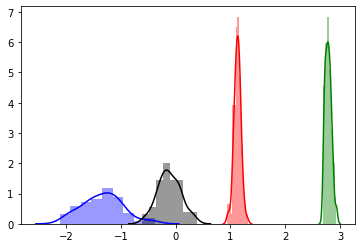

In [55]:
sns.distplot(svi_samples['station_59_hour_0_weekday'],color='blue')# would expect low (weekday midnight-3am)
sns.distplot(svi_samples['station_59_hour_9_weekday'],color='red') # expect high (9am weekday)
sns.distplot(svi_samples['station_70_hour_9_weekday'],color='green')# expect high (popular station)
sns.distplot(svi_samples['station_70_hour_6_weekend'],color='black') #would expect it to be low (weekend at 6-9am)

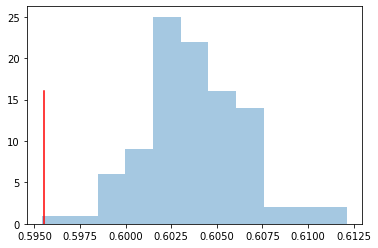

In [36]:
compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                       stat=perc_0)

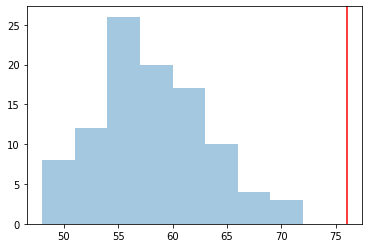

In [37]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                       stat=max_)

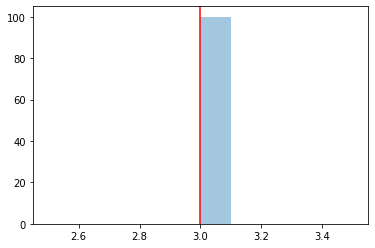

In [38]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                       stat=percentile, q=80)

In [26]:
pss[0,:].shape
data_samp.demand.values.shape

(2014,)

TypeError: len() of unsized object

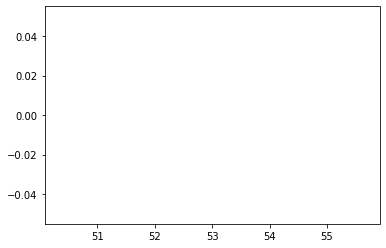